In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def jitter():
    return np.random.uniform(-0.01, 0.01)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

df = pd.read_csv('0524_exp_results.txt', delimiter='\t')
df.head()

,macro,micro,split,pos,mode,obj,window,k,reduce,supervised
0,0.05,0.08,train,NOUN,random,False,1,2,None,False
1,0.01,0.02,dev,NOUN,random,False,1,2,None,False
2,0.06,0.14,train,VERB,random,False,1,2,None,False
3,0.18,0.22,dev,VERB,random,False,1,2,None,False
4,0.58,0.59,train,NOUN,raw,True,1,2,50,True


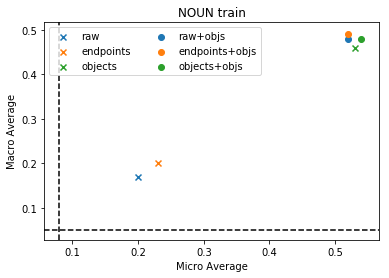

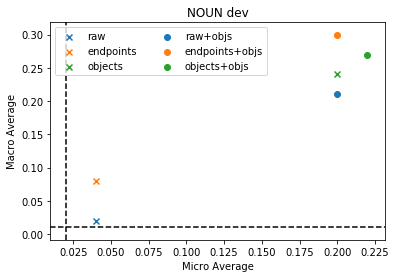

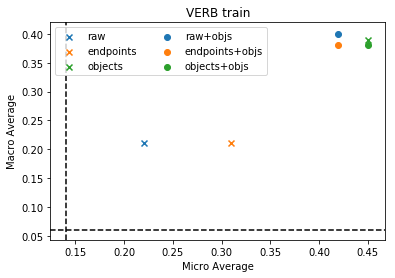

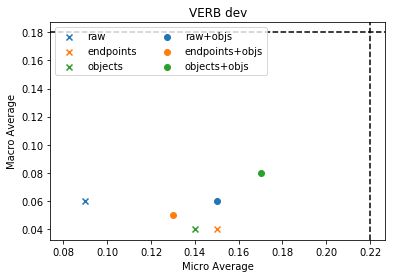

In [170]:
DR = "None"
for pos in ["NOUN", "VERB"]:
    for split in ["train", "dev"]:
        M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        rand_macro = M[M["mode"] == "random"]["macro"]
        rand_micro = M[M["mode"] == "random"]["micro"]
        print(rand_macro)
        break
        plt.axhline(rand_macro, color='k', ls='--')
        plt.axvline(rand_micro, color='k', ls='--')
        
        M = M[M["reduce"] == DR]

        for obj in [False, True]:
            for i, mode in enumerate(["raw", "endpoints", "objects"]):
                m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
                mk = 'o' if obj else 'x'
                l = mode+"+objs" if obj else mode
                plt.scatter(m["micro"], m["macro"], label=l, marker=mk, color=colors[i])

        plt.xlabel("Micro Average")
        plt.ylabel("Macro Average")
        plt.title("%s %s"%(pos, split))
        plt.legend(ncol=2, loc="upper left")
        plt.savefig("figures/%s_%s_dr=%s.pdf"%(pos, split, DR), bbox_inches='tight')
        plt.show()

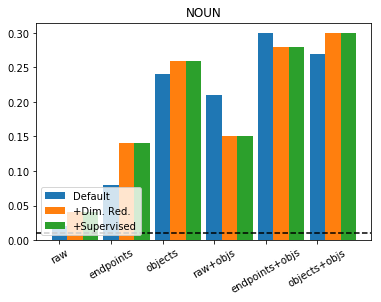

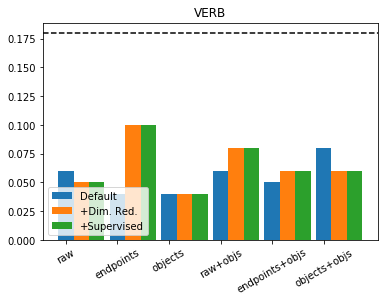

In [171]:
split = "dev"
W = 1
k = 2
idx = 1
for pos in ["NOUN", "VERB"]:

    M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        
    rand_macro = M[M["mode"] == "random"]["macro"].item()
    rand_micro = M[M["mode"] == "random"]["micro"].item()
        
    M = M.loc[(M["k"] == k) & (M['window'] == W)]

    withouts = []
    withs = []
    sups = []
    lbls = []
    for obj in [False, True]:
        for i, mode in enumerate(["raw", "endpoints", "objects"]):
            m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
            mk = 'o' if obj else 'x'
            lbls.append(mode+"+objs" if obj else mode)
            withouts.append(m[m["reduce"] == "None"]["macro"].item())
            withs.append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == False)]["macro"].item())
            sups.append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == True)]["macro"].item())
            
    plt.axhline(rand_macro, color='k', ls='--')
    plt.bar(np.arange(len(withouts)), withouts, width=0.3, label="Default")
    plt.bar(np.arange(len(withouts))+0.3, withs, width=0.3, label="+Dim. Red.")
    plt.bar(np.arange(len(withouts))+0.6, withs, width=0.3, label="+Supervised")
    plt.xticks(np.arange(len(lbls)), lbls, rotation=30)
    plt.legend(loc="lower left")
    plt.title(pos)
    plt.show()

## Appendix

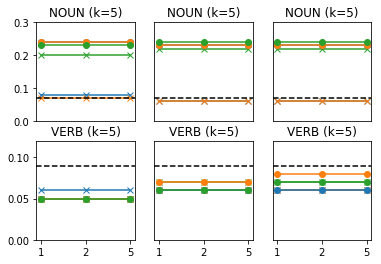

In [145]:
split = "dev"
DR = "None"
W = 1
idx = 1
for pos in ["NOUN", "VERB"]:
    #for W in [1, 2, 5]:
    for k in [2, 5, 10]:
        plt.subplot(2, 3, idx)
        M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        
        rand_macro = M[M["mode"] == "random"]["macro"].item()
        rand_micro = M[M["mode"] == "random"]["micro"].item()
        
        M = M.loc[(M["reduce"] == DR) & (M['window'] == W)]

        for obj in [False, True]:
            for i, mode in enumerate(["raw", "endpoints", "objects"]):
                m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
                mk = 'o' if obj else 'x'
                l = mode+"+objs" if obj else mode
                lst = []
                #for k in [2, 5, 10]:
                for W in [1, 2, 5]:
                    try:
                        lst.append(m[m["k"] == k]["macro"].item())
                    except ValueError:
                        print(m[m["k"] == k])
                plt.plot(np.arange(3), lst, label=l, marker=mk, color=colors[i])
        plt.axhline(rand_macro, color='k', ls='--')
        #plt.title("%s (window=%s)"%(pos, W))
        plt.title("%s (k=%s)"%(pos, W))
        if idx <= 3:
            plt.xticks([])
        else:
            #plt.xticks([0, 1, 2], [2, 5, 10])
            plt.xticks([0, 1, 2], [1, 2, 5])
        if pos == 'NOUN':
            plt.ylim(0, 0.3)
        else:
            plt.ylim(0, 0.12)
        if idx not in [1,4]:
            plt.yticks([])
        idx += 1  
plt.savefig("figures/effect-of-window.pdf", bbox_inches='tight')
#plt.savefig("figures/effect-of-k.pdf", bbox_inches='tight')
plt.show()